#Proyecto Final - UCOM - Big Data

## Importamos librerias

In [0]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import plotly.graph_objs as go
import seaborn as sns
import calendar

##Creamos Librerias

In [0]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType,StructField, StringType, IntegerType 
from pyspark.sql.types import ArrayType, DoubleType, BooleanType
from pyspark.sql.functions import col,array_contains

spark = SparkSession.builder.appName('UCOM_Final').getOrCreate()

##Conectamos al Blob Storage y montamos

In [0]:
#storage_account_name = "blobucom"
#storage_account_key = "TByt2tyb7y2H9mnE/doJ90v69ic2gu/Dv3uXeCaT11vPkopo8/cRXFd8yplKl35wex8pH1Tfk9/b+AStQU5X5A=="
#container = "ucom-datos"

#dbutils.fs.mount(
# source = "wasbs://{0}@{1}.blob.core.windows.net".format(container, storage_account_name),
# mount_point = "/mnt/ucom-datos",
# extra_configs = {"fs.azure.account.key.{0}.blob.core.windows.net".format(storage_account_name): storage_account_key}
#)

### Listado de archivos en el container

In [0]:
dbutils.fs.ls("dbfs:/mnt/ucom-datos")

Out[4]: [FileInfo(path='dbfs:/mnt/ucom-datos/bcim_2016_21_11_2018.gpkg', name='bcim_2016_21_11_2018.gpkg', size=372666368, modificationTime=1665191217000),
 FileInfo(path='dbfs:/mnt/ucom-datos/olist_customers_dataset.csv', name='olist_customers_dataset.csv', size=9033957, modificationTime=1665183726000),
 FileInfo(path='dbfs:/mnt/ucom-datos/olist_geolocation_dataset.csv', name='olist_geolocation_dataset.csv', size=61273883, modificationTime=1665183755000),
 FileInfo(path='dbfs:/mnt/ucom-datos/olist_order_items_dataset.csv', name='olist_order_items_dataset.csv', size=15438671, modificationTime=1665183729000),
 FileInfo(path='dbfs:/mnt/ucom-datos/olist_order_payments_dataset.csv', name='olist_order_payments_dataset.csv', size=5777138, modificationTime=1665183717000),
 FileInfo(path='dbfs:/mnt/ucom-datos/olist_order_reviews_dataset.csv', name='olist_order_reviews_dataset.csv', size=14451670, modificationTime=1665183731000),
 FileInfo(path='dbfs:/mnt/ucom-datos/olist_orders_dataset.csv', name='olist_orders_dataset.csv', size=17654914, modificationTime=1665183742000),
 FileInfo(path='dbfs:/mnt/ucom-datos/olist_products_dataset.csv', name='olist_products_dataset.csv', size=2379446, modificationTime=1665183707000),
 FileInfo(path='dbfs:/mnt/ucom-datos/olist_sellers_dataset.csv', name='olist_sellers_dataset.csv', size=174703, modificationTime=1665183705000),
 FileInfo(path='dbfs:/mnt/ucom-datos/product_category_name_translation.csv', name='product_category_name_translation.csv', size=2613, modificationTime=1665183704000)]

### Cargamos todos los archivos como Dataframes de Spark

In [0]:
spark_customers = spark.read.option("header",True).csv("dbfs:/mnt/ucom-datos/olist_customers_dataset.csv")
spark_geolocation = spark.read.option("header",True).csv("dbfs:/mnt/ucom-datos/olist_geolocation_dataset.csv")
spark_order_items = spark.read.option("header",True).csv("dbfs:/mnt/ucom-datos/olist_order_items_dataset.csv")
spark_payments = spark.read.option("header",True).csv("dbfs:/mnt/ucom-datos/olist_order_payments_dataset.csv")
spark_order_reviews = spark.read.option("header",True).csv("dbfs:/mnt/ucom-datos/olist_order_reviews_dataset.csv")
spark_orders = spark.read.option("header",True).csv("dbfs:/mnt/ucom-datos/olist_orders_dataset.csv")
spark_products = spark.read.option("header",True).csv("dbfs:/mnt/ucom-datos/olist_products_dataset.csv")
spark_sellers = spark.read.option("header",True).csv("dbfs:/mnt/ucom-datos/olist_sellers_dataset.csv")
spark_product_translation = spark.read.option("header",True).csv("dbfs:/mnt/ucom-datos/product_category_name_translation.csv")

### Paso a Dataframe de Pandas (porque me es mas facil)

In [0]:
customers = spark_customers.toPandas()
geolocation = spark_geolocation.toPandas()
order_items = spark_order_items.toPandas()
payments = spark_payments.toPandas()
order_reviews = spark_order_reviews.toPandas()
orders = spark_orders.toPandas()
products = spark_products.toPandas()
sellers = spark_sellers.toPandas()
product_translation = spark_product_translation.toPandas()

In [0]:
order_items.display(5)

order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


### Verificamos buscado Nulls en los DFs

In [0]:
lista = [ customers, geolocation, order_items, payments, order_reviews, orders, products, sellers, product_translation]
print ("#"*50);
for dfs in lista:
    print (dfs.isnull().sum());
    print ("#"*50);

##################################################
customer_id 0
customer_unique_id 0
customer_zip_code_prefix 0
customer_city 0
customer_state 0
dtype: int64
##################################################
geolocation_zip_code_prefix 0
geolocation_lat 0
geolocation_lng 0
geolocation_city 0
geolocation_state 0
dtype: int64
##################################################
order_id 0
order_item_id 0
product_id 0
seller_id 0
shipping_limit_date 0
price 0
freight_value 0
dtype: int64
##################################################
order_id 0
payment_sequential 0
payment_type 0
payment_installments 0
payment_value 0
dtype: int64
##################################################
review_id 1
order_id 2236
review_score 2380
review_comment_title 92157
review_comment_message 63079
review_creation_date 8764
review_answer_timestamp 8785
dtype: int64
##################################################
order_id 0
customer_id 0
order_status 0
order_purchase_timestamp 0
order_approved_at 160
order_delivered_carrier_date 1783
order_delivered_customer_date 2965
order_estimated_delivery_date 0
dtype: int64
##################################################
product_id 0
product_category_name 610
product_name_lenght 610
product_description_lenght 610
product_photos_qty 610
product_weight_g 2
product_length_cm 2
product_height_cm 2
product_width_cm 2
dtype: int64
##################################################
seller_id 0
seller_zip_code_prefix 0
seller_city 0
seller_state 0
dtype: int64
##################################################
product_category_name 0
product_category_name_english 0
dtype: int64
##################################################

#### Hay algunos valores nulls en "order_reviews", "orders" y en "products"; entonces miramos los tipos/formatos de los datos

In [0]:
lista = [customers, geolocation, order_items, payments, order_reviews, orders, products, sellers, product_translation]
print ("#" * 50)
for dfs in lista:
    print (dfs.info())
    print ("#" * 70)

##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 customer_id 99441 non-null object
 1 customer_unique_id 99441 non-null object
 2 customer_zip_code_prefix 99441 non-null object
 3 customer_city 99441 non-null object
 4 customer_state 99441 non-null object
dtypes: object(5)
memory usage: 3.8+ MB
None
######################################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 geolocation_zip_code_prefix 1000163 non-null object
 1 geolocation_lat 1000163 non-null object
 2 geolocation_lng 1000163 non-null object
 3 geolocation_city 1000163 non-null object
 4 geolocation_state 1000163 non-null object
dtypes: object(5)
memory usage: 38.2+ MB
None
######################################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 order_id 112650 non-null object
 1 order_item_id 112650 non-null object
 2 product_id 112650 non-null object
 3 seller_id 112650 non-null object
 4 shipping_limit_date 112650 non-null object
 5 price 112650 non-null object
 6 freight_value 112650 non-null object
dtypes: object(7)
memory usage: 6.0+ MB
None
######################################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 order_id 103886 non-null object
 1 payment_sequential 103886 non-null object
 2 payment_type 103886 non-null object
 3 payment_installments 103886 non-null object
 4 payment_value 103886 non-null object
dtypes: object(5)
memory usage: 4.0+ MB
None
######################################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104162 entries, 0 to 104161
Data columns (total 7 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 review_id 104161 non-null object
 1 order_id 101926 non-null object
 2 review_score 101782 non-null object
 3 review_comment_title 12005 non-null object
 4 review_comment_message 41083 non-null object
 5 review_creation_date 95398 non-null object
 6 review_answer_timestamp 95377 non-null object
dtypes: object(7)
memory usage: 5.6+ MB
None
######################################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 order_id 99441 non-null object
 1 customer_id 99441 non-null object
 2 order_status 99441 non-null object
 3 order_purchase_timestamp 99441 non-null object
 4 order_approved_at 99281 non-null object
 5 order_delivered_carrier_date 97658 non-null object
 6 order_delivered_customer_date 96476 non-null object
 7 order_estimated_delivery_date 99441 non-null object
dtypes: object(8)
memory usage: 6.1+ MB
None
######################################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 product_id 32951 non-null object
 1 product_category_name 32341 non-null object
 2 product_name_lenght 32341 non-null object
 3 product_description_lenght 32341 non-null object
 4 product_photos_qty 32341 non-null object
 5 product_weight_g 32949 non-null object
 6 product_length_cm 32949 non-null object
 7 product_height_cm 32949 non-null object
 8 product_width_cm 32949 non-null object
dtypes: object(9)
memory usage: 2.3+ MB
None
###############

#### Pasamos a lo de "orders" tipo date/hora para que pase

In [0]:
time = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for i in time:
    orders[i] = pd.to_datetime(orders[i])

In [0]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 order_id 99441 non-null object 
 1 customer_id 99441 non-null object 
 2 order_status 99441 non-null object 
 3 order_purchase_timestamp 99441 non-null datetime64[ns]
 4 order_approved_at 99281 non-null datetime64[ns]
 5 order_delivered_carrier_date 97658 non-null datetime64[ns]
 6 order_delivered_customer_date 96476 non-null datetime64[ns]
 7 order_estimated_delivery_date 99441 non-null datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB

In [0]:
order_reviews.head()

Out[12]:

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


#### En "order_review" es de esperarse los null, pero completamos igual con algo por higiene

In [0]:
order_reviews['review_comment_title'] = order_reviews['review_comment_title'].fillna('None')
order_reviews['review_comment_message'] = order_reviews['review_comment_message'].fillna('No Comment')

In [0]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104162 entries, 0 to 104161
Data columns (total 7 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 review_id 104161 non-null object
 1 order_id 101926 non-null object
 2 review_score 101782 non-null object
 3 review_comment_title 104162 non-null object
 4 review_comment_message 104162 non-null object
 5 review_creation_date 95398 non-null object
 6 review_answer_timestamp 95377 non-null object
dtypes: object(7)
memory usage: 5.6+ MB

In [0]:
orders.head()

Out[15]:

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


#### Los datos faltantes son las fechas, en los comentarios y documentacion del dataset esta la hipotesis de que es una orden conjunta. Entonces completamos con el ultimo valor no null
#### podemos usar "ffill" para eso, god bless stackoverflow

In [0]:
orders = orders.fillna(method = 'ffill')

In [0]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 order_id 99441 non-null object 
 1 customer_id 99441 non-null object 
 2 order_status 99441 non-null object 
 3 order_purchase_timestamp 99441 non-null datetime64[ns]
 4 order_approved_at 99441 non-null datetime64[ns]
 5 order_delivered_carrier_date 99441 non-null datetime64[ns]
 6 order_delivered_customer_date 99441 non-null datetime64[ns]
 7 order_estimated_delivery_date 99441 non-null datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB

In [0]:
products.head()

Out[18]:

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40,287,1,225,16,10,14
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44,276,1,1000,30,18,20
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46,250,1,154,18,9,15
3,cef67bcfe19066a932b7673e239eb23d,bebes,27,261,1,371,26,4,26
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37,402,4,625,20,17,13


#### En productos, el tema de las columas es asi:

 - Categoria: Falta el dato en el dataset, entonces completamos nomas con "Otros"
 - product_name_lenght: Puede que el proveedor no pase el dato o que no califique el tipo de producto, entonces se decide rellenar con "Mediana" (segun buenas practicas)
 - product_description_lenght: Puede que el proveedor no pase el dato o que no califique el tipo de producto, entonces se decide rellenar con "Mediana" (segun buenas practicas)
 - product_photos_qty: Puede que el proveedor no pase el dato o que no califique el tipo de producto, entonces se decide rellenar con "Mediana" (segun buenas practicas)
 - product_weight_g: Puede que el proveedor no pase el dato o que no califique el tipo de producto, entonces se decide rellenar con "Mediana" (segun buenas practicas)
 - product_length_cm: Puede que el proveedor no pase el dato o que no califique el tipo de producto, entonces se decide rellenar con "Mediana" (segun buenas practicas)
 - product_height_cm: Puede que el proveedor no pase el dato o que no califique el tipo de producto, entonces se decide rellenar con "Mediana" (segun buenas practicas)
 - product_width_cm: Puede que el proveedor no pase el dato o que no califique el tipo de producto, entonces se decide rellenar con "Mediana" (segun buenas practicas)
 - product_weight_g: Puede que el proveedor no pase el dato o que no califique el tipo de producto, entonces se decide rellenar con "Mediana" (segun buenas practicas)

In [0]:
products['product_category_name'] = products['product_category_name'].fillna('otros')
products = products.fillna(products.median())

In [0]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 product_id 32951 non-null object
 1 product_category_name 32951 non-null object
 2 product_name_lenght 32951 non-null object
 3 product_description_lenght 32951 non-null object
 4 product_photos_qty 32951 non-null object
 5 product_weight_g 32951 non-null object
 6 product_length_cm 32951 non-null object
 7 product_height_cm 32951 non-null object
 8 product_width_cm 32951 non-null object
dtypes: object(9)
memory usage: 2.3+ MB

## Creamos un ALL_DATA
#### Usamos merge y usamos el valor comun, tipo un vlookup/buscarv

In [0]:
geolocation.rename({"geolocation_zip_code_prefix":"customer_zip_code_prefix"}, axis = 1, inplace = True)

data1 = pd.merge(orders, order_items, left_on = 'order_id', right_on = 'order_id')
data2 = pd.merge(data1, sellers, left_on = 'seller_id', right_on = 'seller_id')
data3 = pd.merge(data2, products, left_on = 'product_id', right_on = 'product_id')
data4 = pd.merge(data3, order_reviews, left_on = 'order_id', right_on = 'order_id')
data5 = pd.merge(data4, product_translation, left_on = 'product_category_name', right_on = 'product_category_name')
#data6 = pd.merge(data5, customers, left_on = 'customer_id', right_on = 'customer_id')
#data7 = pd.merge(data6, geolocation, left_on = 'customer_zip_code_prefix', right_on = 'customer_zip_code_prefix')
all_data = pd.merge(data5, payments, how = 'left', left_on = 'order_id', right_on = 'order_id')

In [0]:
all_data

Out[22]:

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,09350,maua,SP,utilidades_domesticas,40,268,4,500,19,8,13,a54f0611adc9ed256b57ede6b6eb5114,4,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,09350,maua,SP,utilidades_domesticas,40,268,4,500,19,8,13,a54f0611adc9ed256b57ede6b6eb5114,4,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,09350,maua,SP,utilidades_domesticas,40,268,4,500,19,8,13,a54f0611adc9ed256b57ede6b6eb5114,4,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares,2,voucher,1,18.59
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,09350,maua,SP,utilidades_domesticas,40,268,4,500,19,8,13,b46f1e34512b0f4c74a72398b03ca788,4,None,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,housewares,1,credit_card,3,37.77
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,09350,maua,SP,utilidades_domesticas,40,268,4,500,19,8,13,dc90f19c2806f1abba9e72ad3c350073,5,None,"Só achei ela pequena pra seis xícaras ,mais é ...",None,None,housewares,1,credit_card,1,37.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115607,442a41b00a8a8bda35511fdf1eb65cc5,e42e2e8642f9c09100b6667e321c2811,invoiced,2018-07-11 22:27:32,2018-07-11 22:45:43,2018-05-21 08:06:00,2018-06-07 21:22:04,2018-07-20,1,5b668636d65ddf4e4109c6d8fb13ea56,7c5b05cbdb5542049f38d90d7815b97d,2018-07-16 22:45:43,44.99,7.58,05201,sao paulo,SP,livros_importados,53,568,1,300,25,2,30,633538990df4c5fb118483feb8557347,1,Atraso na entrega,O pedido do produto foi realizado no dia 11/07...,2018-07-22 00:00:00,2018-07-24 13:06:43,books_imported,1,credit_card,1,52.57
115608,1dbff949801376b8795a093d31cfe205,0cbd2df3d6e9d8b1eaf5cfefc44886bc,delivered,2018-05-16 14:50:54,2018-05-16 15:18:42,2018-05-18 12:10:00,2018-05-21 17:14:08,2018-05-28,1,90797f195eb7bb9dae050697a25f35ce,7c5b05cbdb5542049f38d90d7815b97d,2018-05-22 15:18:42,58.99,7.39,052

## Analisis de los datos en ALL_DATA

## 1- Mejores compradores
#### Contamos la cantidad de ordenes de cada id

In [0]:
count_ordered =all_data.groupby('customer_id')["order_id"].count().rename("Total Ordered").reset_index()
count_ordered

Out[23]:

,customer_id,Total Ordered
0,00012a2ce6f8dcda20d059ce98491703,1
1,000161a058600d5901f007fab4c27140,1
2,0001fd6190edaaf884bcaf3d49edf079,1
3,0002414f95344307404f0ace7a26f1d5,1
4,000379cdec625522490c315e70c7a9fb,1
...,...,...
96512,fffcb937e9dd47a13f05ecb8290f4d3e,1
96513,fffecc9f79fd8c764f843e9951b11341,3
96514,fffeda5b6d849fbd39689bb92087f431,1
96515,ffff42319e9b2d713724ae527742af25,1


### Ordenamos y mostramos el Top 10

In [0]:
top_count_ordered =all_data.groupby('customer_id')["order_id"].count().rename("Total Ordered").reset_index().nlargest(10,'Total Ordered')
top_count_ordered

Out[24]:

,customer_id,Total Ordered
14799,270c23a11d024a44c896d1894b261a83,63
7380,13aa59158da63ba0e93ec6ac2c07aacb,38
58459,9af2372a1e49340278e7c1ef8d749f34,29
55310,92cd3ec6e2d643d4ebd0e3d6238f69e2,26
16525,2ba91e12e5e4c9f56b82b86d9031d329,24
37510,63b964e79dee32a3587651701a2b8dbf,24
41687,6ee2f17e3b6c33d6a9557f280edd2925,24
50763,86cc80fef09f7f39df4b0dbce48e81cb,24
79508,d22f25a9fadfb1abbc2e29395b1239f4,24
67412,b246eeed30b362c09d867b9e598bee51,22


## 2- Estado de las ventas

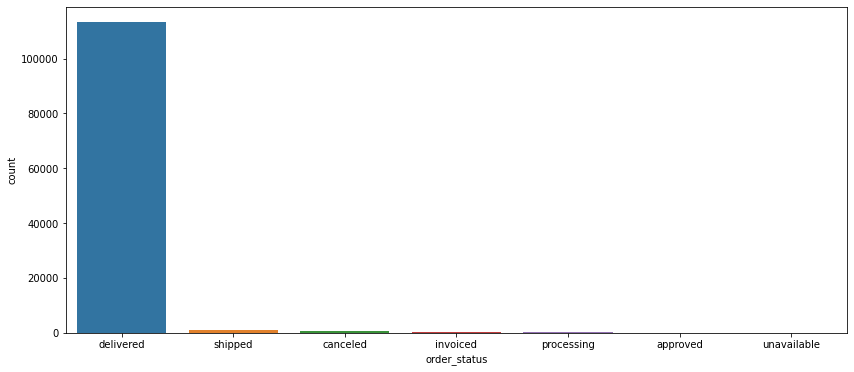

In [0]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.countplot(data=all_data,x='order_status')
plt.show()

## 3- Satisfaccion del cliente (por cliente y por categoria)
#### review entro como str, entonces pasamos a float primero

In [0]:
all_data['review_score'] = all_data['review_score'].astype(float)
all_data.review_score

Out[26]: 0 4.0
1 4.0
2 4.0
3 4.0
4 5.0
 ... 
115607 1.0
115608 5.0
115609 5.0
115610 5.0
115611 1.0
Name: review_score, Length: 115612, dtype: float64

In [0]:
def Clasificador (x):
    if x >= 4: return "Excelente!"
    if x == 3: return "Buena"
    else: return "Mala"
all_data['review_classification'] = all_data.review_score.apply(lambda row:Clasificador (row))
all_data.head(3)

Out[27]:

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value,review_classification
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,09350,maua,SP,utilidades_domesticas,40,268,4,500,19,8,13,a54f0611adc9ed256b57ede6b6eb5114,4.0,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares,1,credit_card,1,18.12,Excelente!
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,09350,maua,SP,utilidades_domesticas,40,268,4,500,19,8,13,a54f0611adc9ed256b57ede6b6eb5114,4.0,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares,3,voucher,1,2.00,Excelente!
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,09350,maua,SP,utilidades_domesticas,40,268,4,500,19,8,13,a54f0611adc9ed256b57ede6b6eb5114,4.0,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares,2,voucher,1,18.59,Excelente!


In [0]:
review_class =all_data.groupby('review_classification')["order_id"].count().rename("Cantidad").reset_index().nlargest(3,'Cantidad')
review_class.index=['Excelente!', 'Bueno', 'Malo']

Out[29]:

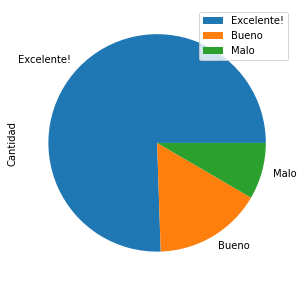

<AxesSubplot:ylabel='Cantidad'>

In [0]:
review_class.plot.pie(y='Cantidad', figsize=(5, 5))

#### Calculamos el score promedio que dejo cada cliente (promedio de todas sus ordenes)

In [0]:
promedio_review =all_data.groupby('customer_id')["review_score"].mean().rename("Score Promedio Reviews").reset_index()
promedio_review

Out[30]:

,customer_id,Score Promedio Reviews
0,00012a2ce6f8dcda20d059ce98491703,1.0
1,000161a058600d5901f007fab4c27140,4.0
2,0001fd6190edaaf884bcaf3d49edf079,5.0
3,0002414f95344307404f0ace7a26f1d5,5.0
4,000379cdec625522490c315e70c7a9fb,4.0
...,...,...
96512,fffcb937e9dd47a13f05ecb8290f4d3e,5.0
96513,fffecc9f79fd8c764f843e9951b11341,3.0
96514,fffeda5b6d849fbd39689bb92087f431,4.0
96515,ffff42319e9b2d713724ae527742af25,5.0


#### Calculamos el score promedio que tiene cada categoria de producto (promedio de todas las ordenes de la categoria)

In [0]:
score_product =all_data.groupby('product_category_name_english')["review_score"].mean().sort_values(ascending=False).rename("Score Promedio Reviews").reset_index()
score_product

Out[31]:

,product_category_name_english,Score Promedio Reviews
0,cds_dvds_musicals,4.642857
1,fashion_childrens_clothes,4.500000
2,books_general_interest,4.438503
3,books_imported,4.419355
4,flowers,4.419355
...,...,...
66,home_comfort_2,3.642857
67,fashion_male_clothing,3.548611
68,office_furniture,3.526791
69,diapers_and_hygiene,3.256410


#### Podemos ver el top de categorias mejor calificadas por clientes

In [0]:
top_review = score_product[:10]
top_review

Out[32]:

,product_category_name_english,Score Promedio Reviews
0,cds_dvds_musicals,4.642857
1,fashion_childrens_clothes,4.500000
2,books_general_interest,4.438503
3,books_imported,4.419355
4,flowers,4.419355
5,costruction_tools_tools,4.415842
6,books_technical,4.375465
7,food_drink,4.324138
8,small_appliances_home_oven_and_coffee,4.320513
9,luggage_accessories,4.295945


#### Podemos plotear para ver mejor, cada categoria vs su cantidad de estrellas

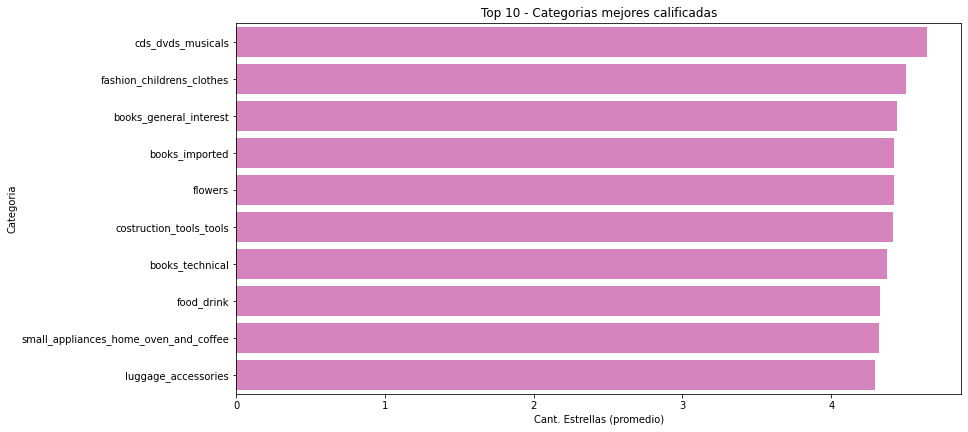

In [0]:
plt.figure(figsize = (13,15))
plt.subplot(211)
base_color = sns.color_palette()[6]
sns.barplot(data = top_review, x = 'Score Promedio Reviews' , y = 'product_category_name_english', color = base_color)
plt.title('Top 10 - Categorias mejores calificadas')
plt.xlabel('Cant. Estrellas (promedio)')
plt.ylabel('Categoria');

## 3- Estado desde donde se realizo la compra
### Cantidad de clientes en cada estado

In [0]:
state_customer = customers.groupby('customer_state')['customer_id'].count().sort_values(ascending = False).rename_axis('Estado'). reset_index(name='Cantidad de Clientes')
state_customer

Out[34]:

,Estado,Cantidad de Clientes
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


#### Poodemos plotear cada estado y su cantidad de clientes

Out[35]:

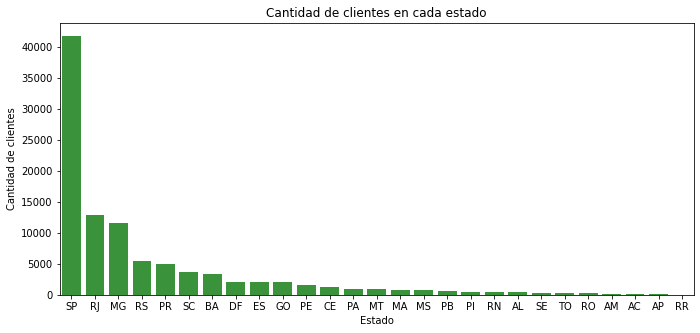

Text(0, 0.5, 'Cantidad de clientes')

In [0]:
plt.figure(figsize = (25,5))
plt.subplot(121)
base_color = sns.color_palette()[2]
sns.barplot(data = state_customer.sort_values('Cantidad de Clientes', ascending = False), x = 'Estado', y = 'Cantidad de Clientes', color = base_color)
plt.title('Cantidad de clientes en cada estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad de clientes')

In [0]:
state_seller = sellers.groupby('seller_state')['seller_id'].count().sort_values(ascending = False).rename_axis('Estado').reset_index(name='Cantidad de Vendedores')
state_seller

Out[36]:

,Estado,Cantidad de Vendedores
0,SP,1849
1,PR,349
2,MG,244
3,SC,190
4,RJ,171
5,RS,129
6,GO,40
7,DF,30
8,ES,23
9,BA,19


Out[37]:

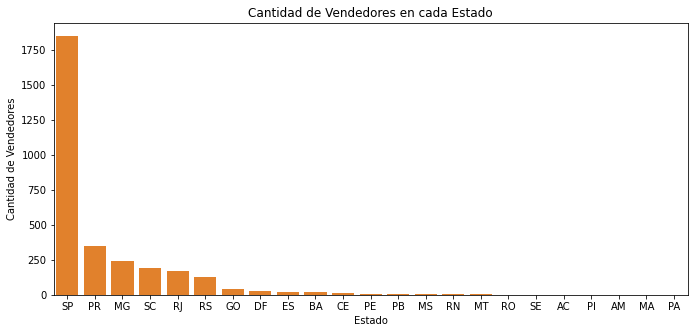

Text(0, 0.5, 'Cantidad de Vendedores')

In [0]:
plt.figure(figsize = (25,5))
plt.subplot(121)
base_color = sns.color_palette()[1]
sns.barplot(data = state_seller.sort_values('Cantidad de Vendedores', ascending = False), x = 'Estado', y = 'Cantidad de Vendedores', color = base_color)
plt.title('Cantidad de Vendedores en cada Estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Vendedores')

### TOP de vendedores segun ventas

In [0]:
top10_seller = all_data.groupby('seller_id').agg(cantidad_vendida = ('order_item_id', 'count'))
sorted_data = top10_seller.sort_values(by='cantidad_vendida', ascending=False).head(10)

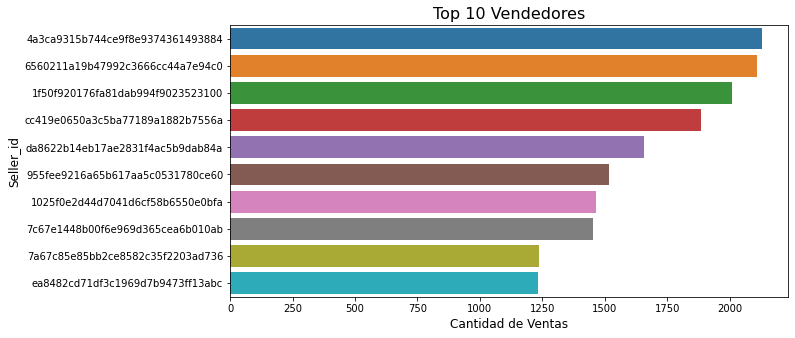

In [0]:
fig=plt.figure(figsize=(10,5))
sns.barplot(y=sorted_data.index, x=sorted_data['cantidad_vendida'])
plt.title('Top 10 Vendedores',fontsize=16);
plt.xlabel('Cantidad de Ventas',fontsize=12);
plt.ylabel('Seller_id',fontsize=12);

### 4 - Cantidad de Productos vendidos por Categoria

In [0]:
product_counts = all_data.product_category_name_english.value_counts().sort_values(ascending = False).rename_axis('Categoria').reset_index(name='Cantidad de ventas')
product_counts

Out[40]:

,Categoria,Cantidad de ventas
0,bed_bath_table,11847
1,health_beauty,9947
2,sports_leisure,8942
3,furniture_decor,8743
4,computers_accessories,8105
...,...,...
66,arts_and_craftmanship,24
67,la_cuisine,15
68,cds_dvds_musicals,14
69,fashion_childrens_clothes,8


#### Este es el top 10 de productos mas vendidos

In [0]:
product_count = all_data.product_category_name_english.value_counts()[:10].sort_values(ascending = False).rename_axis('Categoria').reset_index(name='Cantidad vendida')
product_count

Out[41]:

,Categoria,Cantidad vendida
0,bed_bath_table,11847
1,health_beauty,9947
2,sports_leisure,8942
3,furniture_decor,8743
4,computers_accessories,8105
5,housewares,7331
6,watches_gifts,6161
7,telephony,4692
8,garden_tools,4558
9,auto,4356


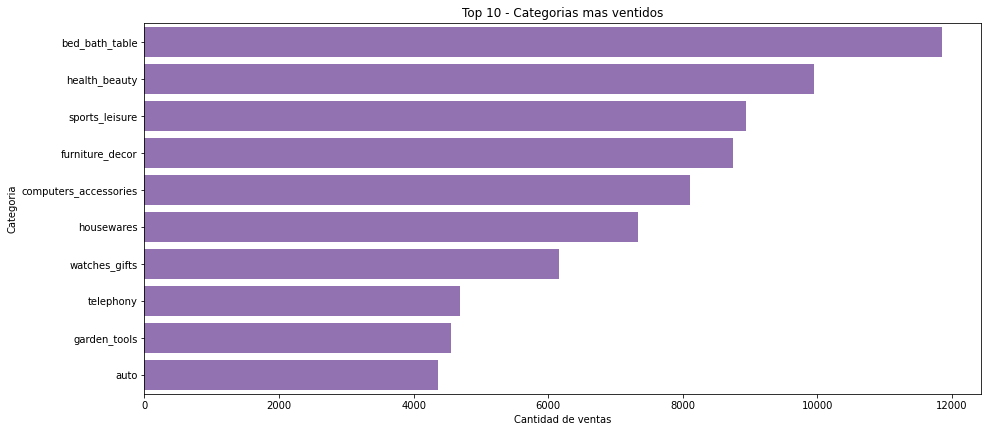

In [0]:
plt.figure(figsize = (15,15))
plt.subplot(211)
base_color = sns.color_palette()[4]
sns.barplot(data = product_count, x = 'Cantidad vendida' , y = 'Categoria', color = base_color)
plt.title('Top 10 - Categorias mas ventidos')
plt.xlabel('Cantidad de ventas')
plt.ylabel('Categoria');

### 5- Medio de pago mas utilizado

In [0]:
payment = payments['payment_type'].value_counts().rename_axis("Medio de pago").reset_index(name ="Cantidad")
payment

Out[43]:

,Medio de pago,Cantidad
0,credit_card,76795
1,boleto,19784
2,voucher,5775
3,debit_card,1529
4,not_defined,3


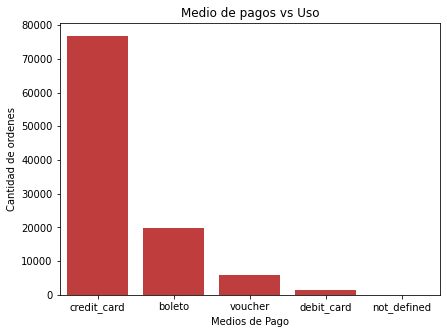

In [0]:
plt.figure(figsize = (15,5))
plt.subplot(121)
base_color = sns.color_palette()[3]
sns.barplot(data = payment, x = 'Medio de pago' , y = 'Cantidad', color = base_color)
plt.title('Medio de pagos vs Uso')
plt.xlabel('Medios de Pago')
plt.ylabel('Cantidad de ordenes');

## 6 - Evolutivo de Ventas

In [0]:
all_data['Year'] = all_data['order_purchase_timestamp'].dt.year
all_data['Month'] = all_data['order_purchase_timestamp'].dt.month_name()

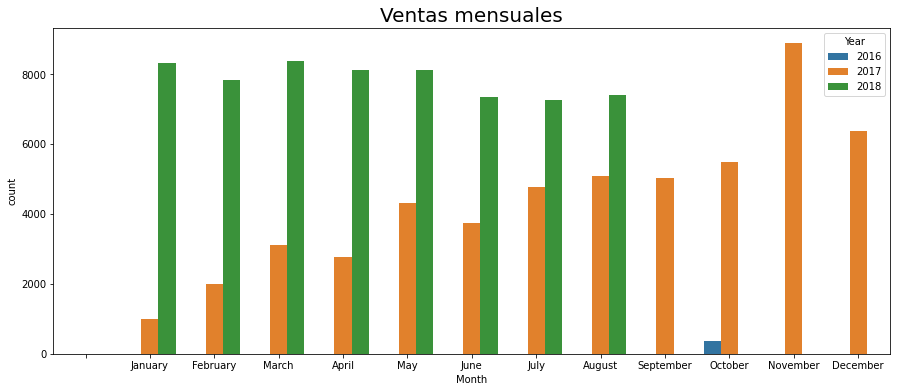

In [0]:
plt.figure(figsize=(15,6))
sns.countplot(data=all_data,x='Month',hue='Year', order=list(calendar.month_name));
plt.title('Ventas mensuales', fontsize=20);

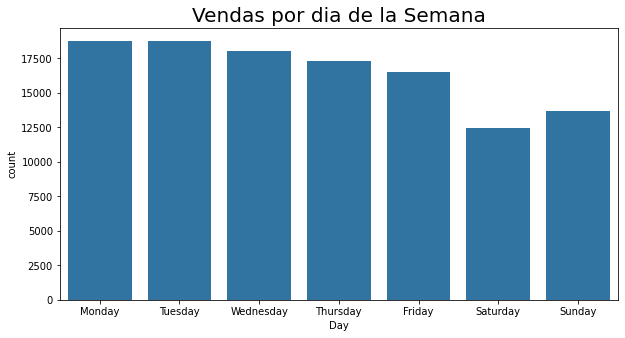

In [0]:
all_data['Day'] = all_data['order_purchase_timestamp'].dt.day_name()
plt.figure(figsize=(10,5))
basecolor=sns.color_palette()[0]
sns.countplot(data=all_data,x='Day',order=list(calendar.day_name),color=basecolor);
plt.title('Vendas por dia de la Semana', fontsize=20);

## 7 - Hora y dia de Entrega

In [0]:
# Changing the data type for date columns
timestamp_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
                  'order_estimated_delivery_date']
for col in timestamp_cols:
    orders[col] = pd.to_datetime(orders[col])
    
# Extracting attributes for purchase date - Year and Month
orders['order_purchase_year'] = orders['order_purchase_timestamp'].apply(lambda x: x.year)
orders['order_purchase_month'] = orders['order_purchase_timestamp'].apply(lambda x: x.month)
orders['order_purchase_month_name'] = orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%b'))
orders['order_purchase_year_month'] = orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m'))
orders['order_purchase_date'] = orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m%d'))

# Extracting attributes for purchase date - Day and Day of Week
orders['order_purchase_day'] = orders['order_purchase_timestamp'].apply(lambda x: x.day)
orders['order_purchase_dayofweek'] = orders['order_purchase_timestamp'].apply(lambda x: x.dayofweek)
orders['order_purchase_dayofweek_name'] = orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%a'))

# Extracting attributes for purchase date - Hour and Time of the Day
orders['order_purchase_hour'] = orders['order_purchase_timestamp'].apply(lambda x: x.hour)
hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Dawn', 'Morning', 'Afternoon', 'Night']
orders['order_purchase_time_day'] = pd.cut(orders['order_purchase_hour'], hours_bins, labels=hours_labels)

# New DataFrame after transformations
orders.head()

Out[48]:

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,Oct,201710,20171002,2,0,Mon,10,Morning
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,Jul,201807,20180724,24,1,Tue,20,Night
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,Aug,201808,20180808,8,2,Wed,8,Morning
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017,11,Nov,201711,20171118,18,5,Sat,19,Night
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018,2,Feb,201802,20180213,13,1,Tue,21,Night


<command-288379500887685>:21: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
 plt.tight_layout()

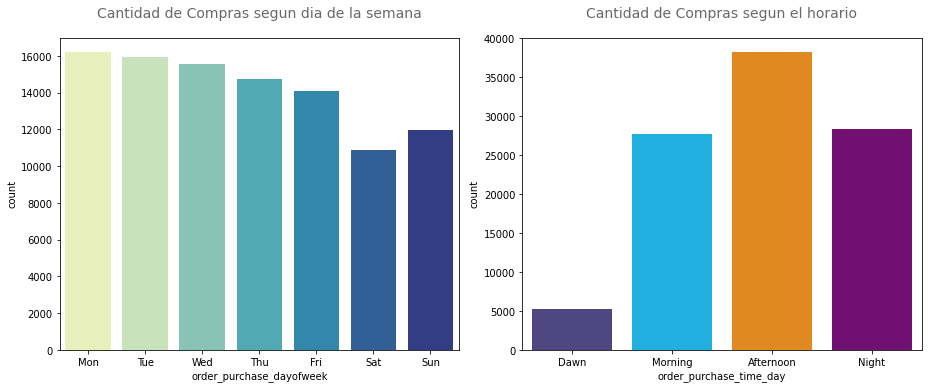

In [0]:
%matplotlib inline
from matplotlib.gridspec import GridSpec

fig = plt.figure(constrained_layout=True, figsize=(13, 10))

# Axis definition
gs = GridSpec(2, 2, figure=fig)
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

sns.countplot(data=orders,x='order_purchase_dayofweek', ax=ax2, palette='YlGnBu')
weekday_label = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax2.set_xticklabels(weekday_label)
ax2.set_title('Cantidad de Compras segun dia de la semana', size=14, color='dimgrey', pad=20)


day_color_list = ['darkslateblue', 'deepskyblue', 'darkorange', 'purple']
sns.countplot(data=orders, x='order_purchase_time_day', ax=ax3, palette=day_color_list)
ax3.set_title('Cantidad de Compras segun el horario', size=14, color='dimgrey', pad=20)

plt.tight_layout()
plt.show()

## 8 - Tiempos de Entrega

In [0]:
all_data['delivery_time'] = all_data['order_delivered_customer_date'] - all_data['order_purchase_timestamp']
all_data.head(3)

Out[50]:

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value,review_classification,Year,Month,Day,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,09350,maua,SP,utilidades_domesticas,40,268,4,500,19,8,13,a54f0611adc9ed256b57ede6b6eb5114,4.0,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares,1,credit_card,1,18.12,Excelente!,2017,October,Monday,8 days 10:28:40
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,09350,maua,SP,utilidades_domesticas,40,268,4,500,19,8,13,a54f0611adc9ed256b57ede6b6eb5114,4.0,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares,3,voucher,1,2.00,Excelente!,2017,October,Monday,8 days 10:28:40
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,09350,maua,SP,utilidades_domesticas,40,268,4,500,19,8,13,a54f0611adc9ed256b57ede6b6eb5114,4.0,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares,2,voucher,1,18.59,Excelente!,2017,October,Monday,8 days 10:28:40


## Grafico de tipo MAP

### Imports

In [0]:
import geopandas as gpd
from shapely.geometry import Point, Polygon, shape
import shapely.speedups
shapely.speedups.enable()

mapa = gpd.read_file("/dbfs/mnt/ucom-datos/bcim_2016_21_11_2018.gpkg", layer = "lim_unidade_federacao_a")

#### Por cantidad de clientes

In [0]:
mapa.rename({"sigla":"Estado"}, axis = 1, inplace = True)
brasil = mapa.merge(state_customer, on = "Estado", how = "left")

brasil.head()

Out[54]:

,nome,nomeabrev,geometriaaproximada,Estado,geocodigo,id_produtor,id_elementoprodutor,cd_insumo_orgao,nr_insumo_mes,nr_insumo_ano,tx_insumo_documento,geometry,Cantidad de Clientes
0,Goiás,None,Sim,GO,52,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743...",2020
1,Mato Grosso do Sul,None,Sim,MS,50,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-56.09815 -17.17220, -56.09159...",715
2,Paraná,None,Sim,PR,41,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903...",5045
3,Minas Gerais,None,Sim,MG,31,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750...",11635
4,Sergipe,None,Sim,SE,28,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ...",350


Out[55]:

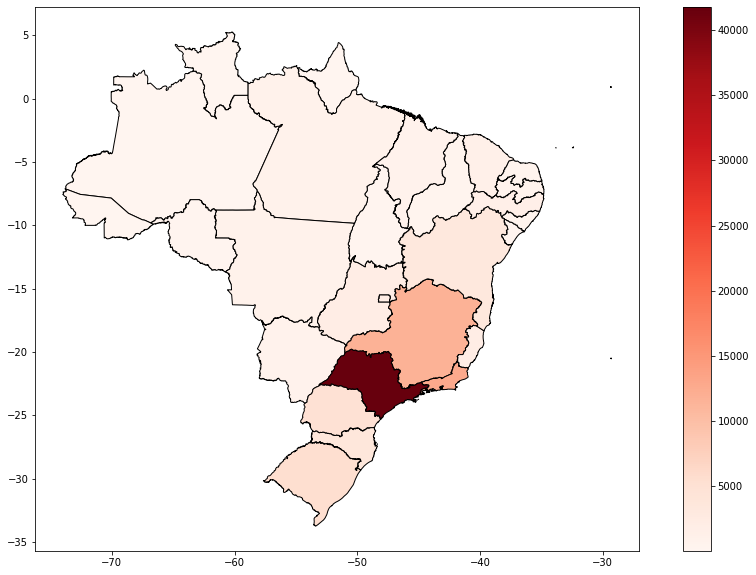

<AxesSubplot:>

In [0]:
%matplotlib inline

brasil.plot(column = "Cantidad de Clientes", cmap= "Reds", figsize = (16,10), legend = True, edgecolor = "black")

#### Por cantidad de Vendedores

In [0]:
mapa.rename({"sigla":"Estado"}, axis = 1, inplace = True)
brasil2 = mapa.merge(state_seller, on = "Estado", how = "left")

brasil2.head()

Out[56]:

,nome,nomeabrev,geometriaaproximada,Estado,geocodigo,id_produtor,id_elementoprodutor,cd_insumo_orgao,nr_insumo_mes,nr_insumo_ano,tx_insumo_documento,geometry,Cantidad de Vendedores
0,Goiás,None,Sim,GO,52,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743...",40.0
1,Mato Grosso do Sul,None,Sim,MS,50,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-56.09815 -17.17220, -56.09159...",5.0
2,Paraná,None,Sim,PR,41,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903...",349.0
3,Minas Gerais,None,Sim,MG,31,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750...",244.0
4,Sergipe,None,Sim,SE,28,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ...",2.0


Out[57]:

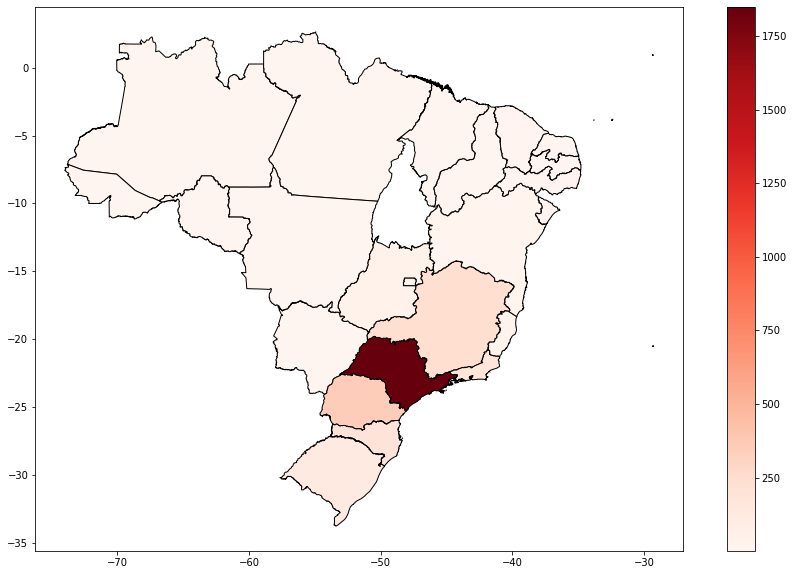

<AxesSubplot:>

In [0]:
%matplotlib inline

brasil2.plot(column = "Cantidad de Vendedores", cmap= "Reds", figsize = (16,10), legend = True, edgecolor = "black")

## DEDE ACA ES WIP // NADA FUNCIONA XD

In [0]:
geolocation.rename({"geolocation_zip_code_prefix":"customer_zip_code_prefix"}, axis = 1, inplace = True)

data6 = pd.merge(order, customers, left_on = 'customer_id', right_on = 'customer_id')
data7 = pd.merge(data6, geolocation, left_on = 'customer_zip_code_prefix', right_on = 'customer_zip_code_prefix')
all_data = pd.merge(data5, payments, how = 'left', left_on = 'order_id', right_on = 'order_id')

--------------------------------------------------------------------------- 
 NameError Traceback (most recent call last)
 <command-288379500887691> in <module> 
 1 geolocation . rename ( { "geolocation_zip_code_prefix" : "customer_zip_code_prefix" } , axis = 1 , inplace = True ) 
 2 
 ----> 3 data6 = pd . merge ( order , customers , left_on = 'customer_id' , right_on = 'customer_id' ) 
 4 data7 = pd . merge ( data6 , geolocation , left_on = 'customer_zip_code_prefix' , right_on = 'customer_zip_code_prefix' ) 
 5 all_data = pd . merge ( data5 , payments , how = 'left' , left_on = 'order_id' , right_on = 'order_id' ) 

 NameError : name 'order' is not defined

In [0]:
# Changing the data type for date columns
timestamp_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
                  'order_estimated_delivery_date']
for col in timestamp_cols:
    all_data[col] = pd.to_datetime(all_data[col])
    
# Extracting attributes for purchase date - Year and Month
all_data['order_purchase_year'] = all_data['order_purchase_timestamp'].apply(lambda x: x.year)

# New DataFrame after transformations
all_data.head()

In [0]:
# Zipping locations
lats = list(all_data.query('order_purchase_year == 2018')['geolocation_lat'].dropna().values)[:30000]
longs = list(all_data.query('order_purchase_year == 2018')['geolocation_lng'].dropna().values)[:30000]
locations = list(zip(lats, longs))

# Creating a mapa using folium
map1 = folium.Map(location=[-15, -50], zoom_start=4.0)

# Plugin: FastMarkerCluster
FastMarkerCluster(data=locations).add_to(map1)

map1